In [1]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import cifar10
import tensorflow.keras as keras
%matplotlib inline

Using TensorFlow backend.


In [2]:
import keras

(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = cifar10.load_data()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

X_train_mean = np.mean(X_train, axis=0)
X_train -= X_train_mean
X_test -= X_train_mean

# Convert class vectors to binary class matrices.
Y_train = keras.utils.to_categorical(Y_train_orig, 10)
Y_test = keras.utils.to_categorical(Y_test_orig, 10)    

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [3]:
# a learning rate scheduler to change the learning rate
def my_schedule(epoch):
    if epoch > 180:
        learning_rate = 5e-7
    elif epoch > 160:
        learning_rate = 1e-6
    elif epoch > 120:
        learning_rate = 1e-5
    elif epoch > 80:
        learning_rate = 1e-4
    else:
        learning_rate = 1e-3
    print('Learning rate: ', learning_rate)
    return learning_rate

scheduler = LearningRateScheduler(my_schedule)

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Res_cifar10_model.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

In [4]:
from cifar10_net import ResNet20
model1 = ResNet20(input_shape = (32, 32, 3), classes = 10)
model1.compile(optimizer=optimizers.Adam(learning_rate=my_schedule(0)), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model1.summary()

Learning rate:  0.001
Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2_1_conv2d_1 (Conv2D)       (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2_1_bn_1 (BatchNormalizatio (None, 32, 32, 16)   64          conv2_1_conv2d_1[0][0]           
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           conv2_1_bn_1[0][0]               
_______________________________________________________________________

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    data_format=None,
    validation_split = 0.0)

In [6]:
history1 = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                              epochs = 100, 
                              validation_data=(X_test, Y_test),
                              callbacks=[scheduler, checkpoint])

Learning rate:  0.001
Epoch 1/100
1562/1563 [============================>.] - ETA: 0s - loss: 1.4441 - accuracy: 0.4748
Epoch 00001: val_accuracy improved from -inf to 0.56150, saving model to C:\Users\Wender\Notebook\proj\saved_models\ResNet_20_model.h5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.4439 - accuracy: 0.4748 - val_loss: 1.2795 - val_accuracy: 0.5615
Learning rate:  0.001
Epoch 2/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.9939 - accuracy: 0.6471
Epoch 00002: val_accuracy improved from 0.56150 to 0.59690, saving model to C:\Users\Wender\Notebook\proj\saved_models\ResNet_20_model.h5
1563/1563 [==============================] - 139s 89ms/step - loss: 0.9939 - accuracy: 0.6471 - val_loss: 1.2056 - val_accuracy: 0.5969
Learning rate:  0.001
Epoch 3/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.8248 - accuracy: 0.7105
Epoch 00003: val_accuracy improved from 0.59690 to 0.67940, saving model to C:\Users\Wender\

1562/1563 [============================>.] - ETA: 0s - loss: 0.3047 - accuracy: 0.8937
Epoch 00024: val_accuracy did not improve from 0.85680
1563/1563 [==============================] - 134s 85ms/step - loss: 0.3046 - accuracy: 0.8937 - val_loss: 0.5930 - val_accuracy: 0.8238
Learning rate:  0.001
Epoch 25/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.2998 - accuracy: 0.8937
Epoch 00025: val_accuracy did not improve from 0.85680
1563/1563 [==============================] - 131s 84ms/step - loss: 0.2998 - accuracy: 0.8937 - val_loss: 0.4685 - val_accuracy: 0.8484
Learning rate:  0.001
Epoch 26/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.2922 - accuracy: 0.8974
Epoch 00026: val_accuracy did not improve from 0.85680
1563/1563 [==============================] - 131s 84ms/step - loss: 0.2922 - accuracy: 0.8974 - val_loss: 0.5105 - val_accuracy: 0.8395
Learning rate:  0.001
Epoch 27/100
1562/1563 [============================>.] - ETA: 0s - loss: 

Learning rate:  0.001
Epoch 49/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.1892 - accuracy: 0.9333
Epoch 00049: val_accuracy improved from 0.88630 to 0.88740, saving model to C:\Users\Wender\Notebook\proj\saved_models\ResNet_20_model.h5
1563/1563 [==============================] - 133s 85ms/step - loss: 0.1891 - accuracy: 0.9333 - val_loss: 0.3629 - val_accuracy: 0.8874
Learning rate:  0.001
Epoch 50/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.1843 - accuracy: 0.9341
Epoch 00050: val_accuracy did not improve from 0.88740
1563/1563 [==============================] - 132s 84ms/step - loss: 0.1844 - accuracy: 0.9341 - val_loss: 0.4040 - val_accuracy: 0.8781
Learning rate:  0.001
Epoch 51/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.1846 - accuracy: 0.9344
Epoch 00051: val_accuracy did not improve from 0.88740
1563/1563 [==============================] - 132s 84ms/step - loss: 0.1846 - accuracy: 0.9344 - val_loss: 0.3850 -

Learning rate:  0.001
Epoch 75/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.1355 - accuracy: 0.9512
Epoch 00075: val_accuracy improved from 0.88830 to 0.89030, saving model to C:\Users\Wender\Notebook\proj\saved_models\ResNet_20_model.h5
1563/1563 [==============================] - 133s 85ms/step - loss: 0.1355 - accuracy: 0.9513 - val_loss: 0.3912 - val_accuracy: 0.8903
Learning rate:  0.001
Epoch 76/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9530
Epoch 00076: val_accuracy did not improve from 0.89030
1563/1563 [==============================] - 131s 84ms/step - loss: 0.1336 - accuracy: 0.9530 - val_loss: 0.4320 - val_accuracy: 0.8804
Learning rate:  0.001
Epoch 77/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.1322 - accuracy: 0.9529
Epoch 00077: val_accuracy did not improve from 0.89030
1563/1563 [==============================] - 133s 85ms/step - loss: 0.1321 - accuracy: 0.9529 - val_loss: 0.4525 -

Learning rate:  0.0001
Epoch 99/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.0576 - accuracy: 0.9806
Epoch 00099: val_accuracy did not improve from 0.90750
1563/1563 [==============================] - 131s 84ms/step - loss: 0.0575 - accuracy: 0.9806 - val_loss: 0.3857 - val_accuracy: 0.9056
Learning rate:  0.0001
Epoch 100/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.0561 - accuracy: 0.9803
Epoch 00100: val_accuracy did not improve from 0.90750
1563/1563 [==============================] - 131s 84ms/step - loss: 0.0560 - accuracy: 0.9803 - val_loss: 0.3794 - val_accuracy: 0.9053


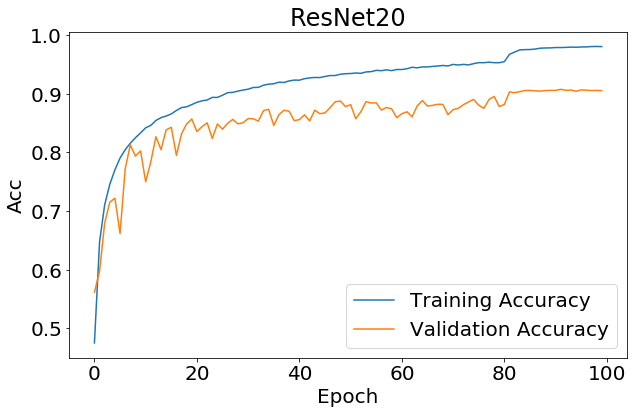

In [7]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

fig1,ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(acc1, label='Training Accuracy')
ax1.plot(val_acc1, label='Validation Accuracy')

ax1.set_xlabel(r'Epoch', fontsize=20)
ax1.set_ylabel(r'Acc', fontsize=20)
ax1.set_title('ResNet20', fontsize=24)

ax1.tick_params(labelsize=20)

ax1.legend(loc=4, fontsize=20)

plt.show()